## Mini Project

In [378]:
import cv2 
import sys
import numpy as np
import matplotlib.pyplot as plt


In [379]:
def drawRectangle(frame, bbox):
    p1 = (int(bbox[0]), int(bbox[1]))
    p2 = (int(bbox[0] + bbox[2]), int(bbox[1] + bbox[3]))
    cv2.rectangle(frame, p1, p2, (255, 0, 0), 2, 1)

def displayRectangle(frame, bbox):
    plt.figure(figsize=(20, 10))
    frameCopy = frame.copy()
    drawRectangle(frameCopy, bbox)
    frameCopy = cv2.cvtColor(frameCopy, cv2.COLOR_RGB2BGR)
    plt.imshow(frameCopy)
    #plt.axis("off")

def drawText(frame, txt, location, color=(50, 170, 50)):
    cv2.putText(frame, txt, location, cv2.FONT_HERSHEY_SIMPLEX, 1, color, 3)

In [380]:
def Crop(image_set):
    out = []
    for img in image_set:
        crop = img[650:1350, 400:900]
        crop = img[650:1700, 400:1200]
        out.append(crop)
    return out

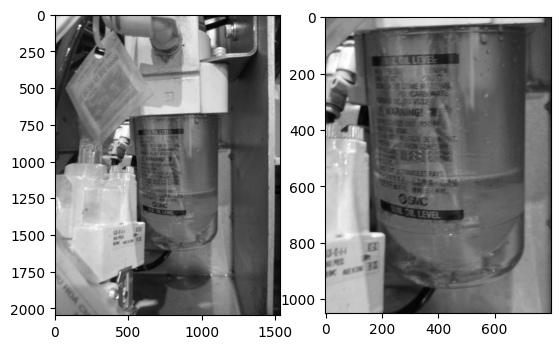

In [381]:
src = cv2.imread("images/test2.jpg", cv2.IMREAD_GRAYSCALE)
crop = src[650:1350, 400:900]
crop = src[650:1700, 400:1200]
plt.subplot(121); plt.imshow(src, cmap="gray")
plt.subplot(122); plt.imshow(crop, cmap="gray")

In [382]:
def show(image_set, column=3, ratio=0.5, color=True):
    row = int(np.ceil(len(image_set) / column))
    h, w = image_set[0].shape[:2]
    max_width = 20  # inch
    max_height = 15  # inch
    fig_w = min(ratio * w * column, max_width)
    fig_h = min(ratio * h * row, max_height)
    plt.figure(figsize=(fig_w, fig_h))
    for i, img in enumerate(image_set):
        plt.subplot(row, column, i + 1)
        plt.imshow(img, cmap='gray')

In [383]:
def setlabel(image_set):
    pass

In [384]:
image_set = []
for i in range(1, 7):
    path = f"images/test{i}.jpg"
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    image_set.append(img)

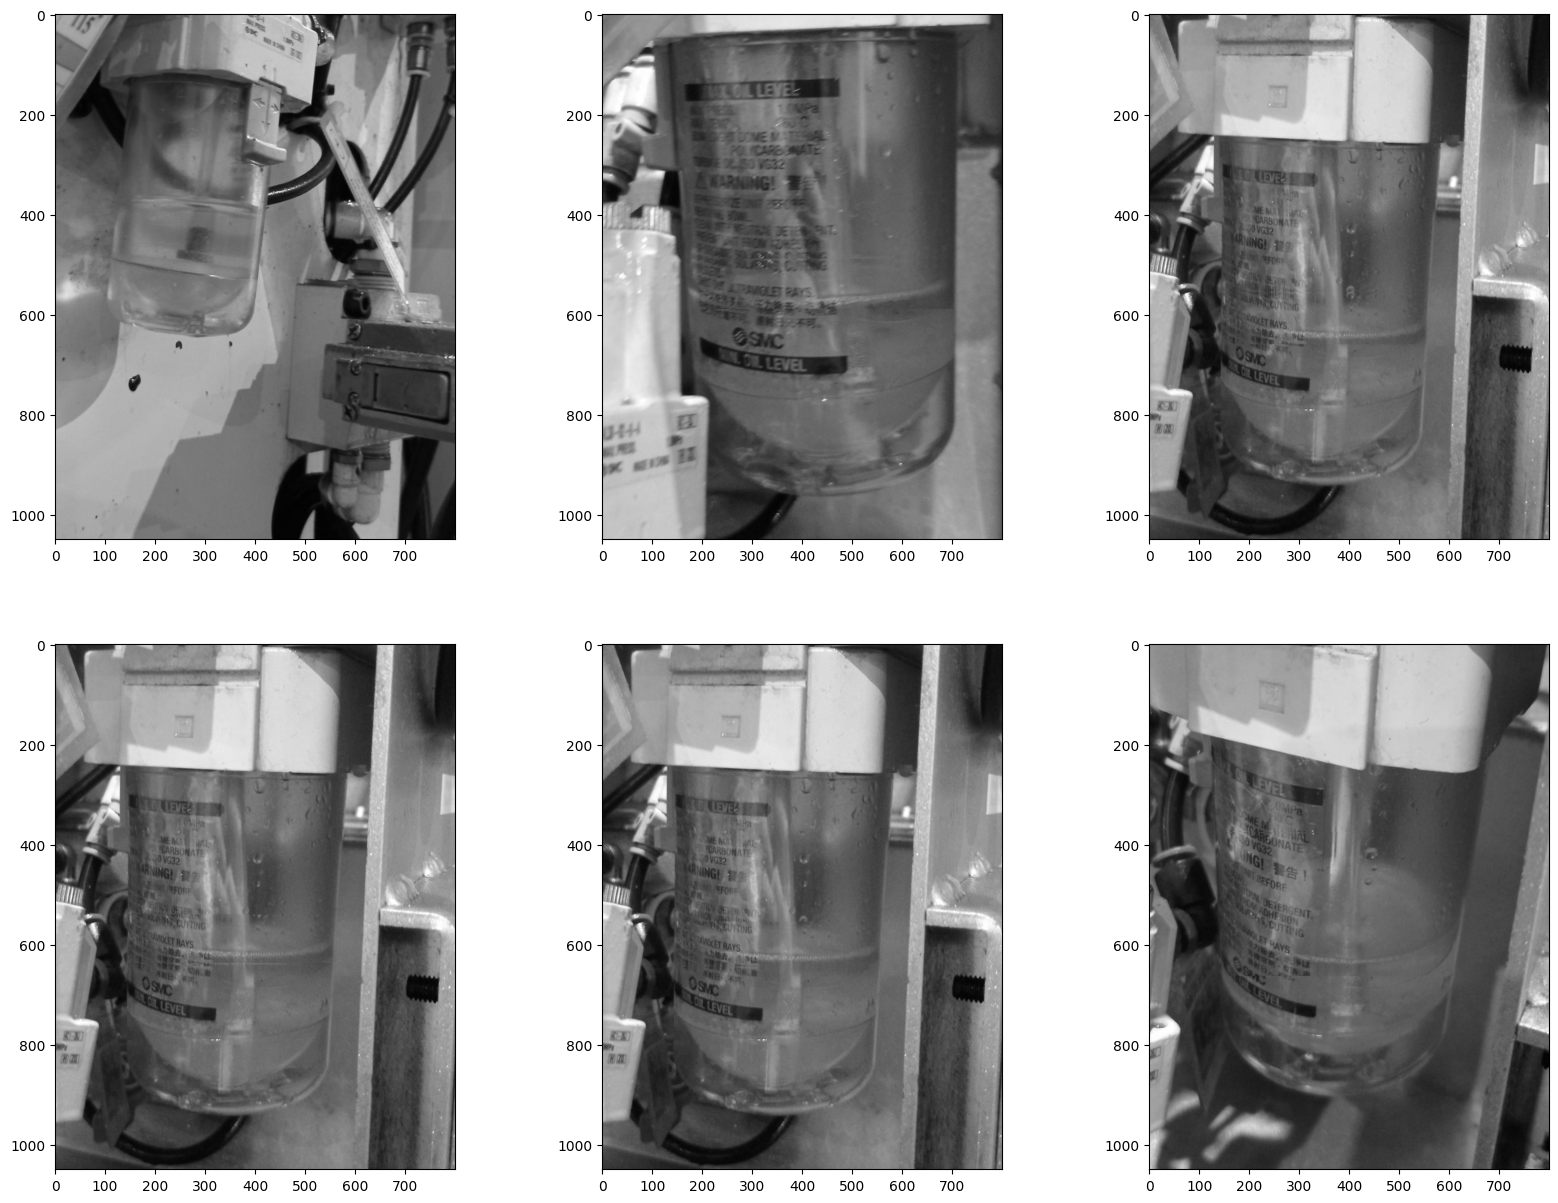

In [385]:
out_set = Crop(image_set)
show(out_set)

In [386]:
def Thre(image_set):
    out = []
    for img in image_set:
        h, w = img.shape
        for i in range(h):
            for j in range(w):
                if img[i][j] < 50:
                    img[i][j] = 0
        out.append(img)
    return out

In [387]:
def Threa(src, L=150, U=25):
    img = src.copy()
    h, w = img.shape
    for i in range(h):
        for j in range(w):
            if img[i][j] > L:
                img[i][j] = 255
            elif img[i][j] < U:
                img[i][j] = 0
    return img

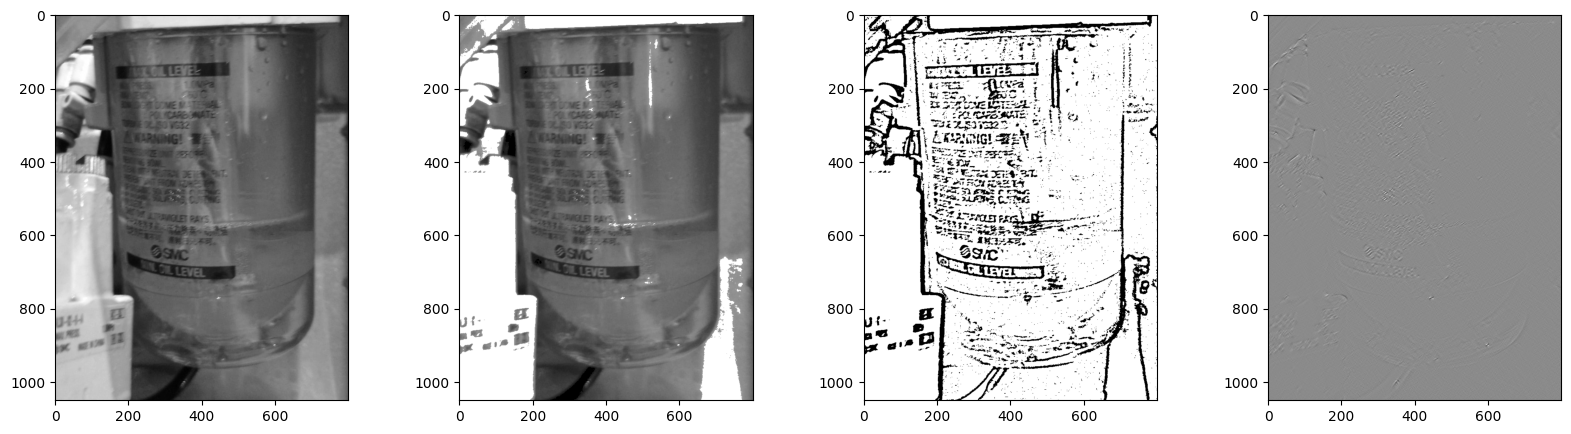

In [392]:
out = Threa(out_set[1])
dst = cv2.adaptiveThreshold(out, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 15, 5)
sobely = cv2.Sobel(out_set[1],cv2.CV_64F,1,1,ksize=5)

plt.figure(figsize=[20, 5])
plt.subplot(141); plt.imshow(out_set[1], cmap="gray")
plt.subplot(142); plt.imshow(out, cmap="gray")
plt.subplot(143); plt.imshow(dst, cmap="gray")
plt.subplot(144); plt.imshow(sobely, cmap="gray")